In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\Rajasree Unnithan R\Downloads\fake_transactional_data_24 (1).csv")

In [2]:
unique_business_df = df.loc[pd.to_numeric(df['to_randomly_generated_account'], errors='coerce').isna(), ['to_randomly_generated_account']].drop_duplicates()

In [3]:
def remove_non_alphabets(s):
    return ''.join(char if char.isalpha() else ' ' for char in s)

In [4]:
unique_business_df['cleaned_recipient_account'] = unique_business_df['to_randomly_generated_account'].apply(lambda x: remove_non_alphabets(str(x)))

In [5]:
from nltk.tokenize import word_tokenize
unique_business_df['words'] = unique_business_df['cleaned_recipient_account'].apply(lambda x: word_tokenize(str(x).lower()))

In [6]:
similarity_mapping = {
    'Cafe' : ['coffee', 'cafe'],
    'Roasterie/Tea Shop' : ['tea', 'bean', 'roasterie'],
    'Book Store' : ['book', 'bookshop'], 
    'Bar':['bar', 'watering'],
    'Alcohol Store' : ['wine', 'alcohol', 'liquor','whiskey','alcohol'],
    'Pub' : ['pub'],
    'Fast Food' : ['kebab', 'lunch', 'sandwich'],
    'Restaurant/Takeaway' : ['restaurant', 'seafood' , 'steak', 'takeaway'],
    'Cinema' : ['cinema','dvd'],
    'Streaming Service' : ['streaming'],
    'Home' : ['diy', 'home'],
    'Cook Shop' : ['cookshop'],
    'Supermarket' : ['supermarket'],
    'Greengrocer' : ['greengrocer'],
    'Pets' : ['pet'],
    "Children's Shop" : ['child','toy', 'kids', 'childrens', 'childrends', 'school'],
    'Clothing Store' : ['clothing', 'fashion', 'clothes'],
    'Gym' : ['gym'],
    'Sports Store' : ['sport','sportsware','running','trainer'],
    'Tech Store' : ['tech','electronics'],
    'Butcher' : ['butcher', 'butchers'],
    'Turkey Farm' : [ 'turkey'],
    'Gaming' : ['game'],
    'Accessory Shop' : ['jewllery', 'accessory'],
    'Flower Shop' : ['florist'],
    'Department Store' : ['department']
}

In [7]:
unique_business_df['group'] = unique_business_df['words'].apply(lambda x: next((group for group, values in similarity_mapping.items() if any(word in values for word in x)), 'OTHER'))

In [8]:
unique_business_df = unique_business_df[['to_randomly_generated_account', 'group']].drop_duplicates()

In [9]:
mapped_df = pd.merge(df, unique_business_df, on='to_randomly_generated_account', how='left')

In [10]:
mapped_df['group'] = mapped_df['group'].fillna('Personal Accounts')

In [11]:
mapped_df.columns

Index(['from_totally_fake_account', 'monopoly_money_amount',
       'to_randomly_generated_account', 'not_happened_yet_date', 'group'],
      dtype='object')

In [12]:
df_wide = mapped_df.pivot_table(index='from_totally_fake_account', columns='group', values='monopoly_money_amount', aggfunc='sum')

In [13]:
df_wide = df_wide.fillna(0)
df_wide = df_wide.reset_index()

In [14]:
df_wide

group,from_totally_fake_account,Accessory Shop,Alcohol Store,Bar,Book Store,Butcher,Cafe,Children's Shop,Cinema,Clothing Store,...,Personal Accounts,Pets,Pub,Restaurant/Takeaway,Roasterie/Tea Shop,Sports Store,Streaming Service,Supermarket,Tech Store,Turkey Farm
0,1000.0,0.0,114.98,3081.0,8.0,0.00,1955.20,160.0,252.0,145.0,...,18213.05,529.0,1530.90,1613.39,68.18,0.0,107.88,681.93,0.0,0.0
1,1002.0,0.0,154.97,2511.5,0.0,0.00,483.75,268.0,309.0,0.0,...,6467.30,0.0,1947.97,1503.67,61.82,175.0,107.88,1045.61,0.0,0.0
2,1006.0,0.0,107.95,2237.5,412.0,1484.98,2075.95,1480.0,227.0,65.0,...,4062.70,0.0,1946.80,1576.16,31.36,0.0,107.88,931.20,0.0,0.0
3,1018.0,0.0,39.99,1691.5,20.0,1016.00,32.60,59.0,28.0,2009.0,...,4307.70,30.0,832.00,1771.22,52.73,84.0,0.00,1288.22,0.0,0.0
4,1053.0,0.0,179.97,2402.0,0.0,18.00,725.85,133.0,222.0,2561.0,...,6305.35,0.0,1473.21,1731.32,127.27,115.0,107.88,1119.22,79.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8137,100931.0,0.0,279.95,3254.0,353.0,1220.18,639.05,175.0,335.0,0.0,...,6812.75,0.0,2376.58,1273.04,148.64,1690.0,107.88,1086.86,170.0,0.0
8138,100934.0,0.0,93.98,2818.5,518.0,0.00,598.90,0.0,185.0,195.0,...,5067.00,0.0,1595.60,1448.38,35.00,0.0,107.88,5716.51,0.0,0.0
8139,100947.0,0.0,78.96,3358.0,503.0,27.00,758.00,120.0,297.0,131.0,...,4796.98,0.0,1560.29,1779.67,69.09,90.0,107.88,5700.33,276.0,0.0
8140,100986.0,0.0,128.95,2850.0,35.0,0.00,65.10,0.0,258.0,197.0,...,2651.87,10.0,2011.13,1720.79,40.00,1007.0,107.88,3863.01,0.0,0.0


Correlation Matrix:
group                 Butcher    Cinema  Clothing Store  Department Store  \
group                                                                       
Butcher              1.000000  0.013604       -0.037220         -0.032751   
Cinema               0.013604  1.000000        0.002544         -0.003543   
Clothing Store      -0.037220  0.002544        1.000000          0.848969   
Department Store    -0.032751 -0.003543        0.848969          1.000000   
Greengrocer          0.991638  0.015175       -0.038547         -0.033976   
Gym                 -0.005670  0.017634       -0.011824         -0.018217   
Pub                 -0.015455  0.005660        0.009613          0.005886   
Restaurant/Takeaway -0.036003  0.015278        0.005349         -0.000350   
Sports Store        -0.002660  0.024049       -0.014723         -0.018773   
Streaming Service    0.011857  0.972991        0.005772          0.000024   
Supermarket         -0.451918 -0.004858        0.043768 

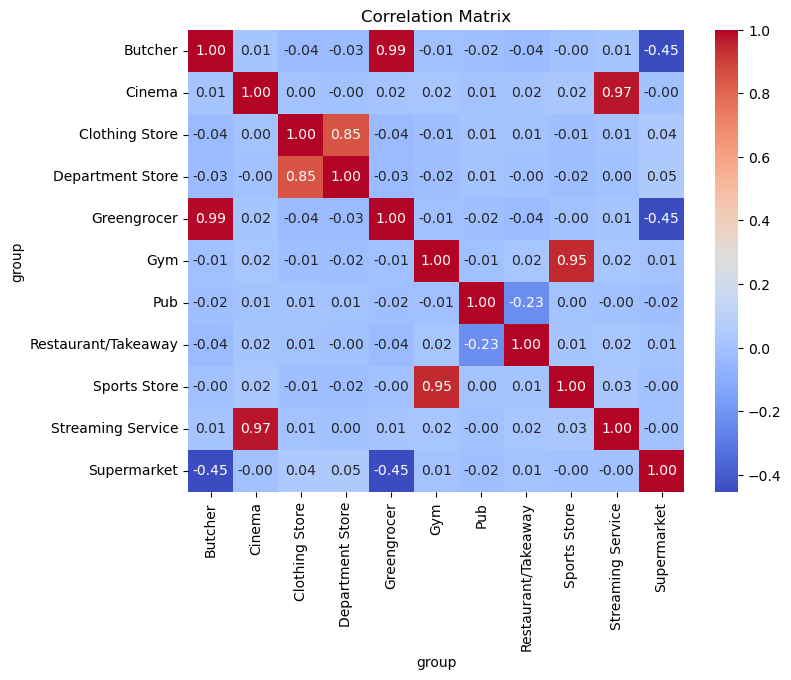

<Figure size 640x480 with 0 Axes>

In [15]:
selected_columns = ['Butcher', 'Cinema', 'Clothing Store', 'Department Store', 'Greengrocer', 'Gym', 'Pub', 'Restaurant/Takeaway', 'Sports Store', 'Streaming Service', 'Supermarket']

# Calculate the correlation matrix
correlation_matrix = df_wide[selected_columns].corr()

# Print or visualize the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Optional: Visualize the correlation matrix as a heatmap using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
plt.savefig("figure.png")

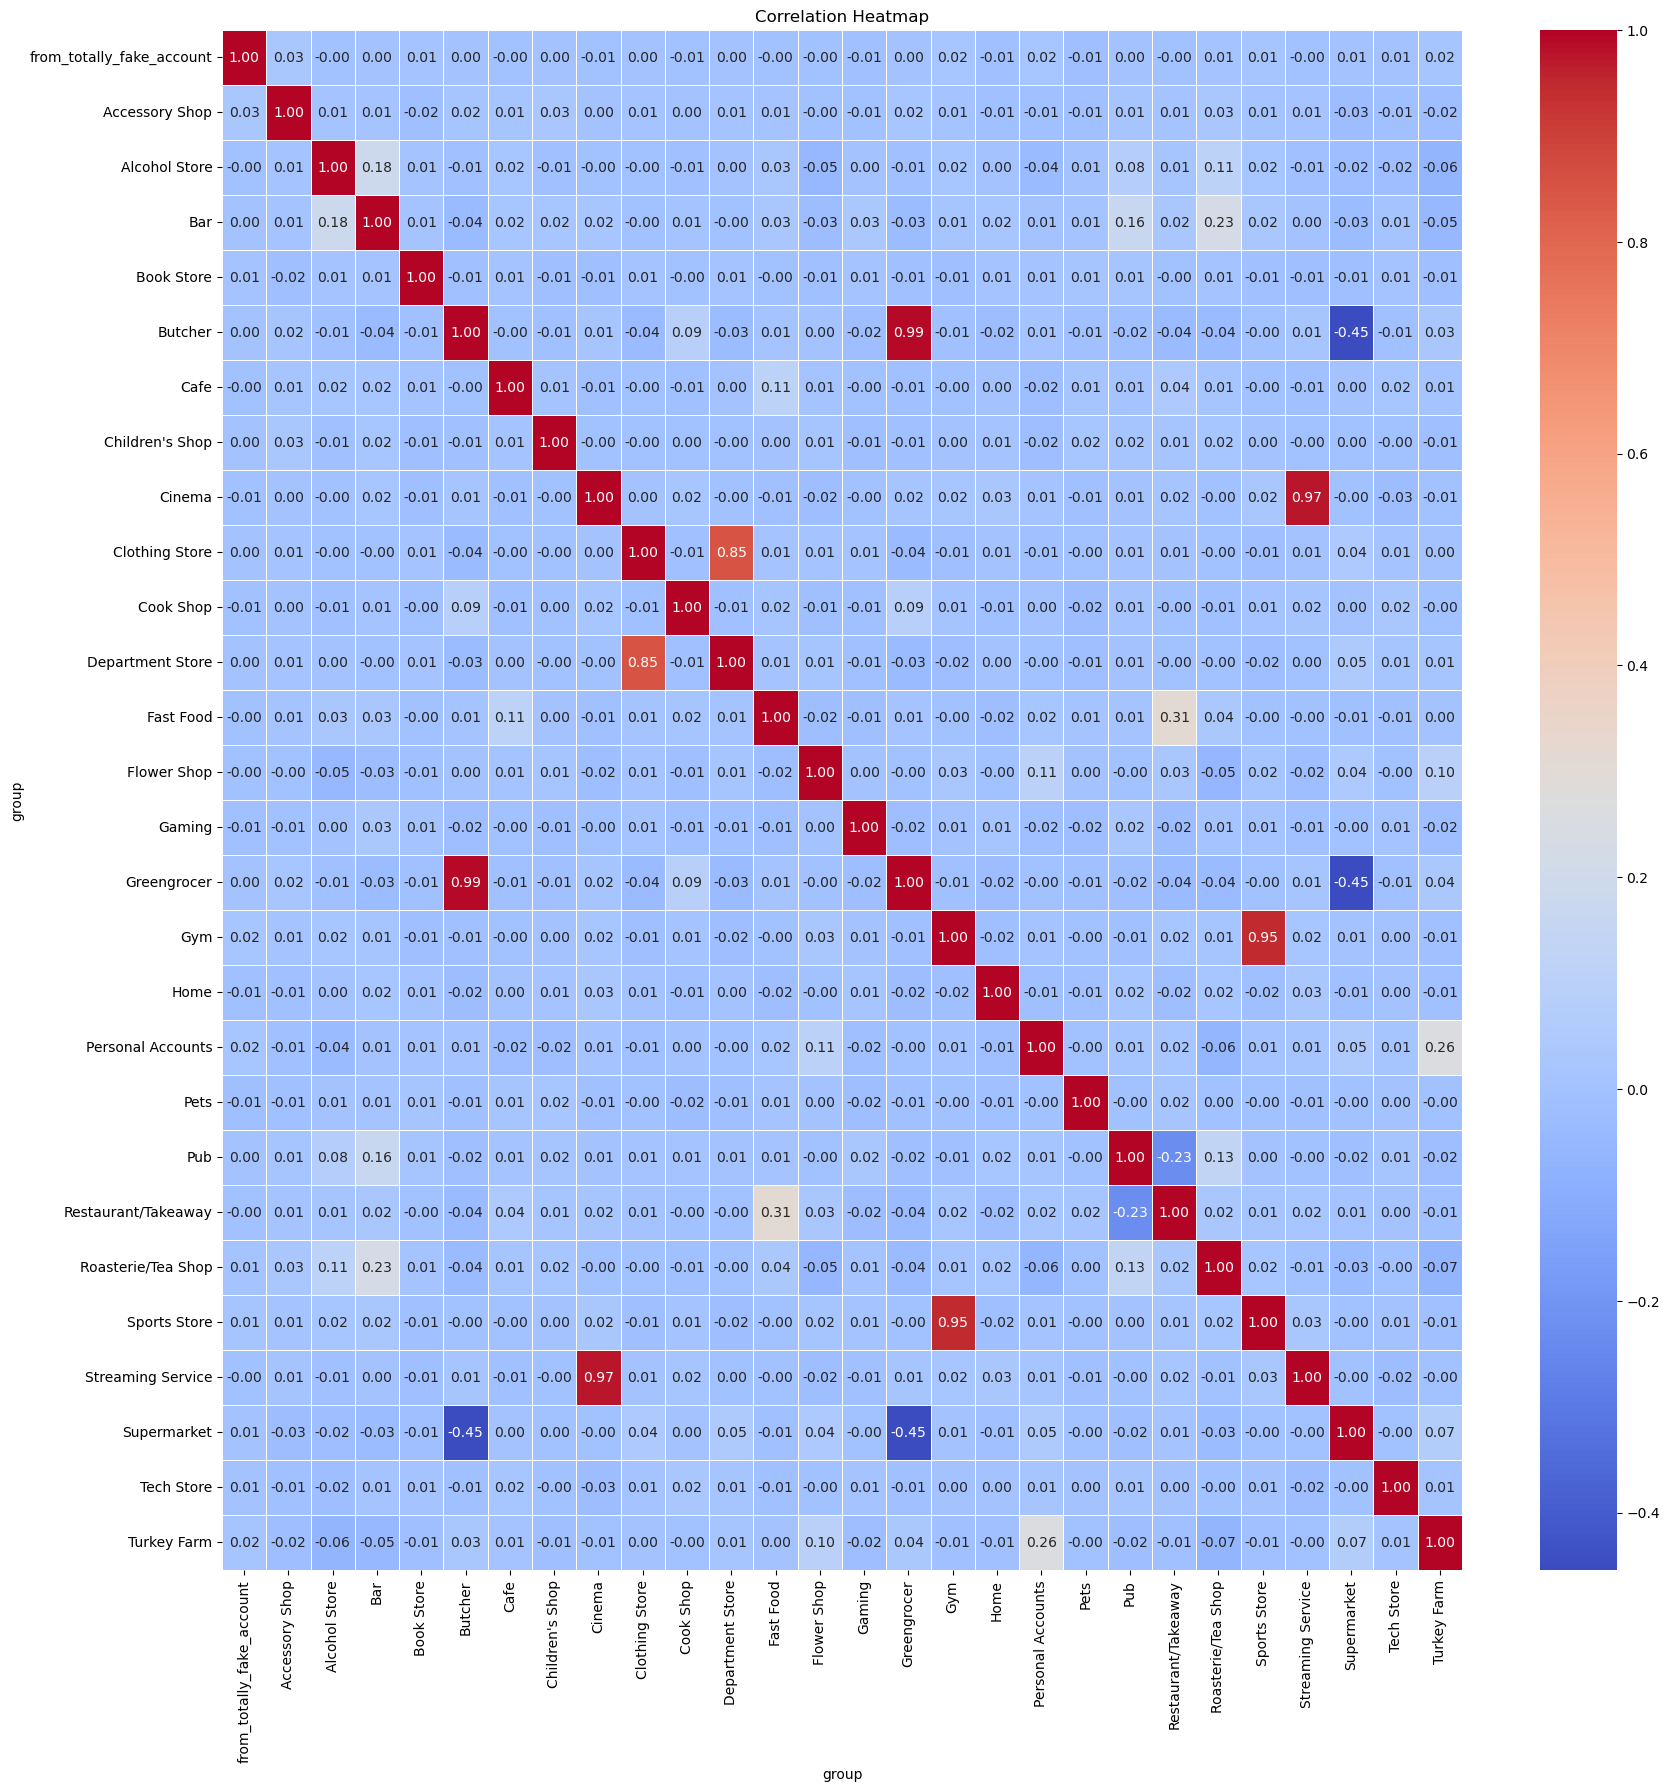

In [16]:
correlation_matrix = df_wide.corr()

# Create a heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [17]:
#from sklearn.model_selection import train_test_split
#X_train, X_test = train_test_split(df_wide, test_size=0.25, random_state=42)
X = df_wide.copy()
X

group,from_totally_fake_account,Accessory Shop,Alcohol Store,Bar,Book Store,Butcher,Cafe,Children's Shop,Cinema,Clothing Store,...,Personal Accounts,Pets,Pub,Restaurant/Takeaway,Roasterie/Tea Shop,Sports Store,Streaming Service,Supermarket,Tech Store,Turkey Farm
0,1000.0,0.0,114.98,3081.0,8.0,0.00,1955.20,160.0,252.0,145.0,...,18213.05,529.0,1530.90,1613.39,68.18,0.0,107.88,681.93,0.0,0.0
1,1002.0,0.0,154.97,2511.5,0.0,0.00,483.75,268.0,309.0,0.0,...,6467.30,0.0,1947.97,1503.67,61.82,175.0,107.88,1045.61,0.0,0.0
2,1006.0,0.0,107.95,2237.5,412.0,1484.98,2075.95,1480.0,227.0,65.0,...,4062.70,0.0,1946.80,1576.16,31.36,0.0,107.88,931.20,0.0,0.0
3,1018.0,0.0,39.99,1691.5,20.0,1016.00,32.60,59.0,28.0,2009.0,...,4307.70,30.0,832.00,1771.22,52.73,84.0,0.00,1288.22,0.0,0.0
4,1053.0,0.0,179.97,2402.0,0.0,18.00,725.85,133.0,222.0,2561.0,...,6305.35,0.0,1473.21,1731.32,127.27,115.0,107.88,1119.22,79.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8137,100931.0,0.0,279.95,3254.0,353.0,1220.18,639.05,175.0,335.0,0.0,...,6812.75,0.0,2376.58,1273.04,148.64,1690.0,107.88,1086.86,170.0,0.0
8138,100934.0,0.0,93.98,2818.5,518.0,0.00,598.90,0.0,185.0,195.0,...,5067.00,0.0,1595.60,1448.38,35.00,0.0,107.88,5716.51,0.0,0.0
8139,100947.0,0.0,78.96,3358.0,503.0,27.00,758.00,120.0,297.0,131.0,...,4796.98,0.0,1560.29,1779.67,69.09,90.0,107.88,5700.33,276.0,0.0
8140,100986.0,0.0,128.95,2850.0,35.0,0.00,65.10,0.0,258.0,197.0,...,2651.87,10.0,2011.13,1720.79,40.00,1007.0,107.88,3863.01,0.0,0.0


## K-Means 

C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init

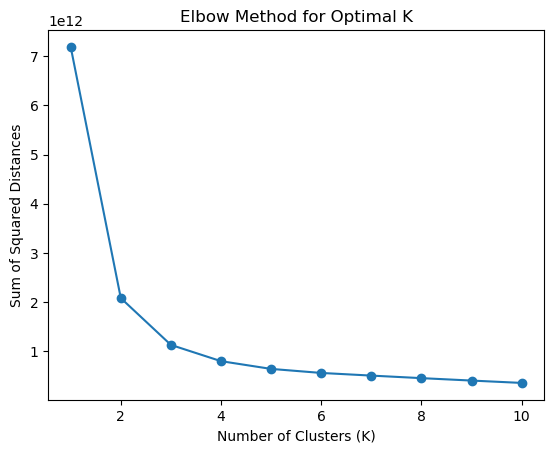

In [18]:
# Loop over values of k from 1 to 10
from sklearn.cluster import KMeans
k_values = range(1, 11)
inertia_values = []

# Fit k-means for different K values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.show()

C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rajasree Unnithan R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init

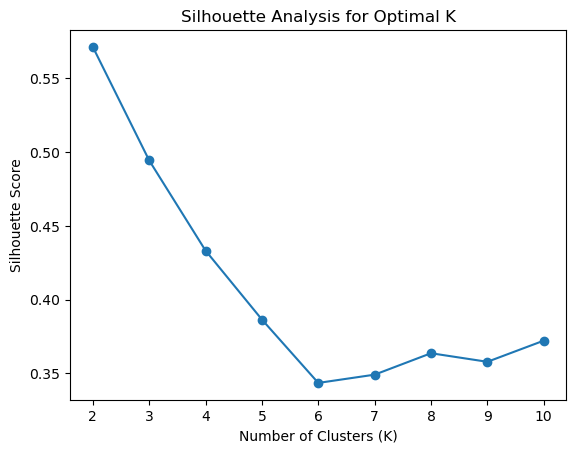

In [19]:
from sklearn.metrics import silhouette_score

k_values = range(2, 11)
silhouette_scores = []

# Fit k-means for different K values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

## DBScan

In [20]:
X = df_wide.copy()
#Pre-Processing data for PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)

X_preprocessed = pd.DataFrame(data=X,columns=df_wide.columns)
X = X_preprocessed.copy()
X.head(10)

group,from_totally_fake_account,Accessory Shop,Alcohol Store,Bar,Book Store,Butcher,Cafe,Children's Shop,Cinema,Clothing Store,...,Personal Accounts,Pets,Pub,Restaurant/Takeaway,Roasterie/Tea Shop,Sports Store,Streaming Service,Supermarket,Tech Store,Turkey Farm
0,-1.721446,-0.209904,0.436094,0.976814,-0.677560,-0.599963,1.577195,-0.523225,1.237585,-0.580847,...,1.333084,4.157364,-0.105397,0.112409,-0.692446,-0.413176,1.215332,-1.115270,-0.328702,-0.497579
1,-1.721376,-0.209904,1.030108,-0.139304,-0.708020,-0.599963,-0.484581,-0.381506,1.722139,-0.733514,...,-0.569112,-0.391550,1.082925,-0.272921,-0.781466,0.094348,1.215332,-0.922030,-0.328702,-0.497579
2,-1.721238,-0.209904,0.331669,-0.676295,0.860670,2.432758,1.746388,1.208895,1.025062,-0.665077,...,-0.958532,-0.391550,1.079591,-0.018340,-1.207807,-0.413176,1.215332,-0.982822,-0.328702,-0.497579
3,-1.720824,-0.209904,-0.677813,-1.746358,-0.631870,1.474977,-1.116727,-0.655758,-0.666624,1.381712,...,-0.918854,-0.133577,-2.096711,0.666699,-0.908696,-0.169564,-0.822821,-0.793121,-0.328702,-0.497579
4,-1.719614,-0.209904,1.401459,-0.353905,-0.708020,-0.563202,-0.145354,-0.558654,0.982557,1.962899,...,-0.595340,-0.391550,-0.269768,0.526572,0.134623,-0.079660,1.215332,-0.882918,-0.056749,-0.497579
5,-1.719407,-0.209904,-1.123287,-1.051601,1.119579,-0.599963,-0.545533,1.531699,-0.870646,-0.598746,...,-0.518170,-0.391550,1.818050,-0.263755,1.209854,0.184253,-0.822821,-0.900840,-0.328702,-0.497579
6,-1.718993,-0.209904,1.475433,-1.637588,-0.574757,-0.538695,-0.462302,-0.716120,0.991058,-0.733514,...,-0.945875,-0.391550,-0.048726,-0.726558,-0.717920,2.165046,1.215332,-0.839762,1.292685,-0.497579
7,-1.718751,-0.209904,-0.766938,-0.874237,-0.708020,-0.177214,-0.332553,1.090796,1.424606,-0.733514,...,-1.401839,-0.391550,-0.790518,-0.626890,-1.099612,0.053747,1.215332,1.458815,-0.328702,-0.497579
8,-1.718474,-0.209904,2.945986,-1.214266,-0.612832,1.895684,-0.452844,0.769304,1.271589,1.107964,...,-0.841976,0.124395,0.780196,0.562113,-0.049715,-0.073859,1.215332,-0.879347,-0.328702,-0.497579
9,-1.718440,-0.209904,-0.826354,1.075785,-0.544297,-0.599963,1.796831,-0.587523,-0.743132,-0.621909,...,-0.635632,-0.391550,0.176248,0.047579,-0.921433,-0.413176,-0.822821,-1.051923,-0.328702,-0.497579


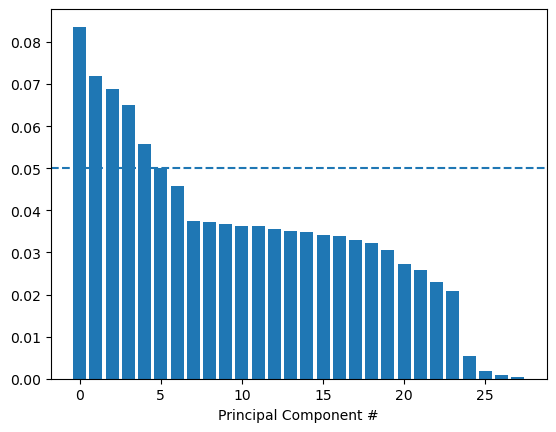

In [21]:
from sklearn.decomposition import PCA

pca= PCA()
pca.fit(X)
exp_variance = pca.explained_variance_ratio_

#plotting explained variance

fig,ax = plt.subplots()
ax.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principal Component #')
ax.axhline(y=0.05, linestyle='--');

In [22]:
#Graph shows only features 0 and 1 are above 10%
#Running PCA with only these features

n_components = 5

pca = PCA(n_components=n_components, random_state=42)

X = pca.fit_transform(X)

In [23]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid
from sklearn.datasets import make_blobs

# Generate synthetic data with clusters of different densities
#X, _ = make_blobs(n_samples=30000, centers=4, cluster_std=[1.0, 0.7, 0.5,0.3], random_state=42)
#X = df_wide.copy()

param_grid = {'eps': [0.1, 0.5, 1.0, 1.5], 'min_samples': [3, 5, 10, 15]}
best_score = -1
best_params = None

for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(**params)
    labels = dbscan.fit_predict(X)
    
    # Check if there are at least two unique labels
    unique_labels = len(np.unique(labels))
    if unique_labels > 1:
        score = silhouette_score(X, labels)
        if score > best_score:
            best_score = score
            best_params = params

print("Best Hyperparameters:", best_params)
print("Best Silhouette Score:", best_score)

Best Hyperparameters: {'eps': 1.0, 'min_samples': 5}
Best Silhouette Score: 0.3713157413940989


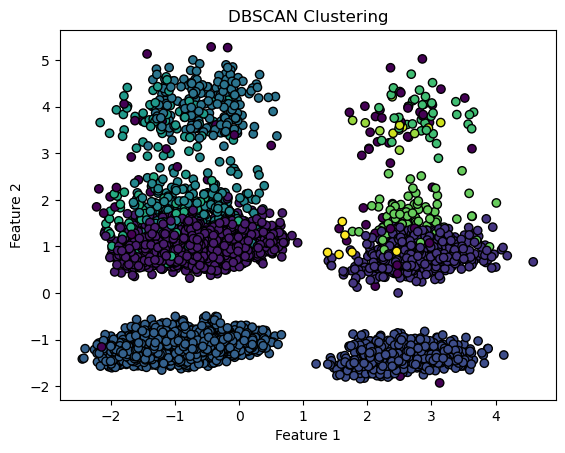

In [25]:
# Apply DBSCAN
dbscan = DBSCAN(eps= 1.0, min_samples= 5)
labels = dbscan.fit_predict(X)

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='k')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

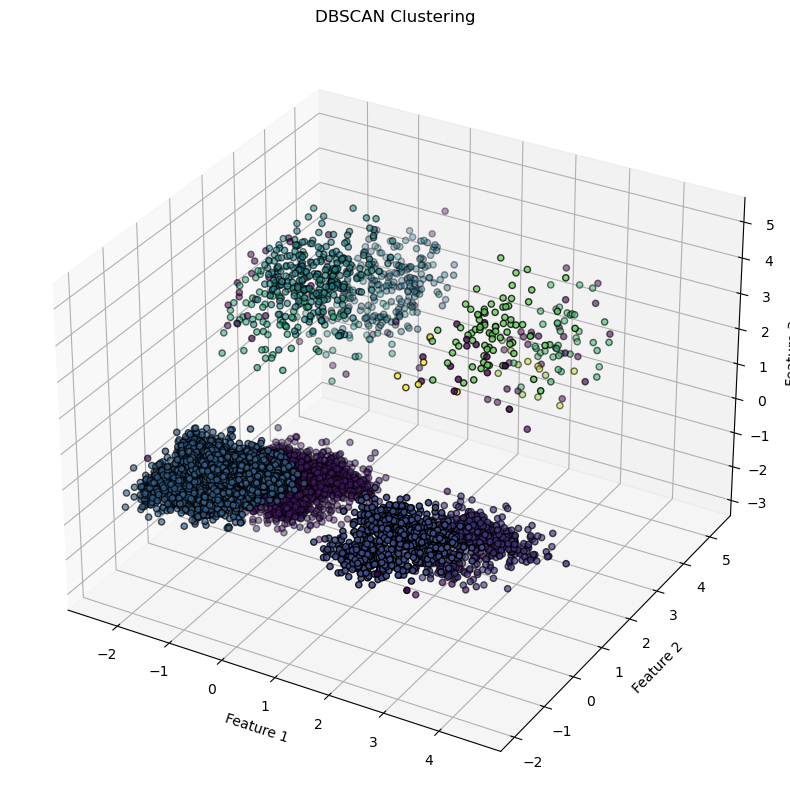

In [26]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting functionality

# Assuming X has three features for 3D plotting
# Modify this based on your actual data

# Apply DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=5)
labels = dbscan.fit_predict(X)

# Visualize the results in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotting the points in 3D space
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', marker='o', edgecolors='k')

# Setting labels for the axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Setting the title
plt.title('DBSCAN Clustering')

plt.show()

## HDBScan

In [27]:
from sklearn.cluster import HDBSCAN

# Generate synthetic data with clusters of different densities
#X, _ = make_blobs(n_samples=30000, centers=4, cluster_std=[1.0, 0.7, 0.5, 0.3], random_state=42)
#X = df_wide.copy()

param_grid = {'min_cluster_size': [50, 100, 200, 500], 'min_samples': [1, 3, 5, 10]}
best_score = -1
best_params = None

for params in ParameterGrid(param_grid):
    hdbscan = HDBSCAN(**params)
    labels = hdbscan.fit_predict(X)
    
    # Check if there are at least two unique labels
    unique_labels = len(np.unique(labels))
    if unique_labels > 1:
        score = silhouette_score(X, labels)
        if score > best_score:
            best_score = score
            best_params = params

print("Best Hyperparameters:", best_params)
print("Best Silhouette Score:", best_score)

Best Hyperparameters: {'min_cluster_size': 50, 'min_samples': 1}
Best Silhouette Score: 0.452139027522452


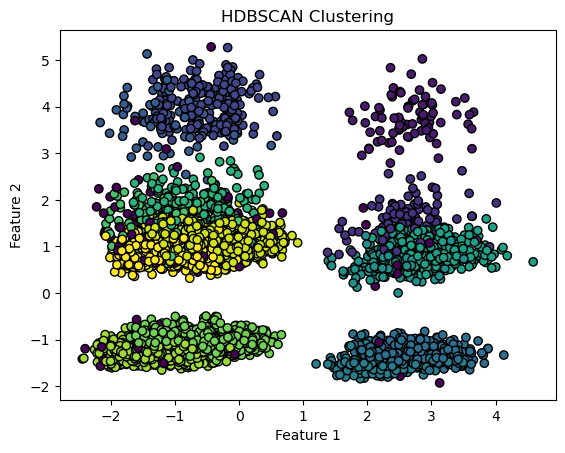

In [28]:
# Apply HDBSCAN
hdbscan = HDBSCAN(min_cluster_size= 50, min_samples= 1)
labels = hdbscan.fit_predict(X)

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='k')
plt.title('HDBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

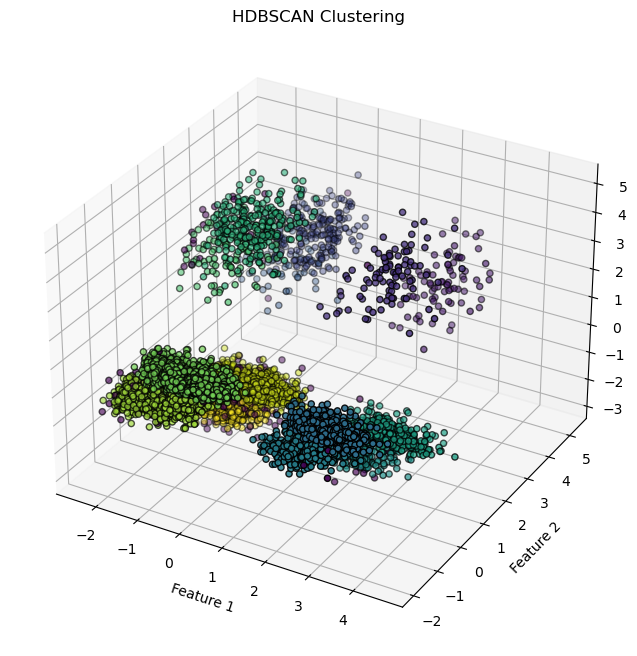

In [29]:
# Apply HDBSCAN
hdbscan = HDBSCAN(min_cluster_size=50, min_samples=1)
labels = hdbscan.fit_predict(X)

# Visualize the results in 3D
fig = plt.figure(figsize=(10, 8))  # Adjust the width and height as needed
ax = fig.add_subplot(111, projection='3d')

# Plotting the points in 3D space
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', marker='o', edgecolors='k')

# Setting labels for the axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Setting the title
plt.title('HDBSCAN Clustering')

plt.show()

## OPTICS

In [30]:
from sklearn.cluster import OPTICS

# Generate synthetic data with clusters of different densities
#X_train, _ = make_blobs(n_samples=30000, centers=4, cluster_std=[1.0, 0.7, 0.5, 0.3], random_state=42)

param_grid = {'eps': [0.1, 0.5, 1.0, 1.5], 'min_samples': [3, 5, 10, 15]}
best_score = -1
best_params = None

for params in ParameterGrid(param_grid):
    optics = OPTICS(**params)
    labels = optics.fit_predict(X)
    
    # Check if there are at least two unique labels
    unique_labels = len(np.unique(labels))
    if unique_labels > 1:
        score = silhouette_score(X, labels)
        if score > best_score:
            best_score = score
            best_params = params

print("Best Hyperparameters:", best_params)
print("Best Silhouette Score:", best_score)

Best Hyperparameters: {'eps': 0.1, 'min_samples': 15}
Best Silhouette Score: 0.12123239890049675


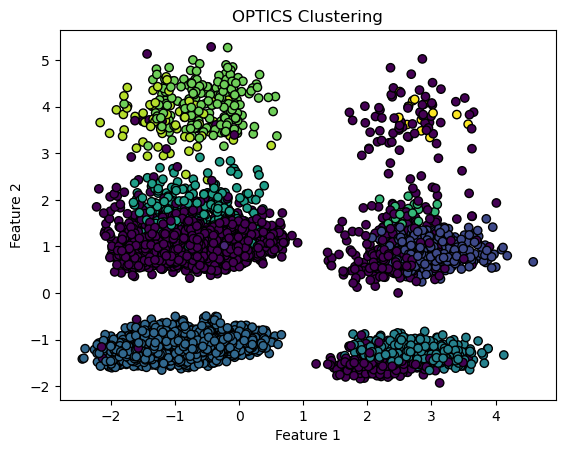

In [31]:
# Apply OPTICS
optics = OPTICS(eps= 0.1, min_samples= 15)
labels = optics.fit_predict(X)

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o', edgecolors='k')
plt.title('OPTICS Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

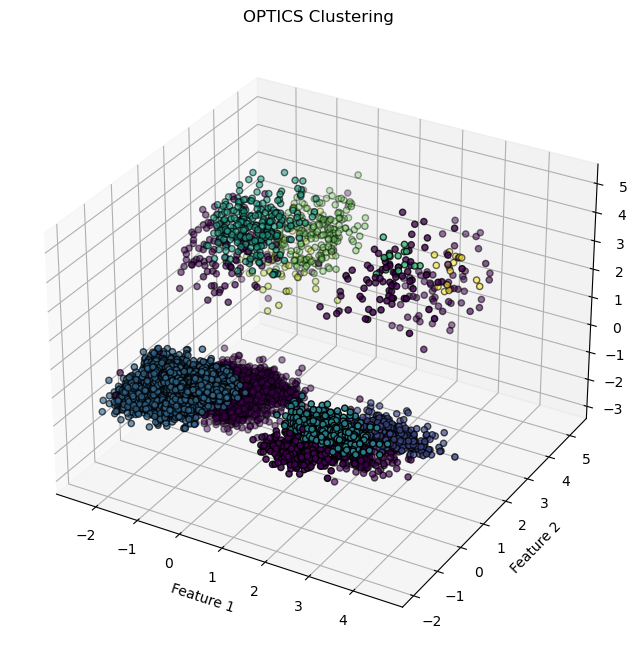

In [32]:
# Apply OPTICS
optics = OPTICS(eps=0.1, min_samples=15)
labels = optics.fit_predict(X)

# Visualize the results in 3D
fig = plt.figure(figsize=(10, 8))  # Adjust the width and height as needed
ax = fig.add_subplot(111, projection='3d')

# Plotting the points in 3D space
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', marker='o', edgecolors='k')

# Setting labels for the axes
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Setting the title
plt.title('OPTICS Clustering')

plt.show()